In [358]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [359]:
df = pd.read_csv('credit_score.csv',low_memory=False)

In [360]:
df = df.drop(columns=['ID','Customer_ID','Name','SSN','Type_of_Loan','Credit_History_Age'])

In [361]:
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,3,...,4.0,_,809.98,26.822620,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,February,23,Scientist,19114.12,NaN,3,4,3,4,-1,...,4.0,Good,809.98,31.944960,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,March,-500,Scientist,19114.12,NaN,3,4,3,4,3,...,4.0,Good,809.98,28.609352,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,April,23,Scientist,19114.12,NaN,3,4,3,4,5,...,4.0,Good,809.98,31.377862,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,6,...,4.0,Good,809.98,24.797347,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [362]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  object 
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  object 
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  object 
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    92998 non-null   object 
 11  Changed_Credit_Limit      100000 non-null  object 
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                100000 non-null  ob

In [363]:
df.shape

(100000, 22)

In [364]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [365]:
df.isna().sum()

Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [366]:
# # Data Cleaning


# Age
df['Age'] = df['Age'].str.replace('_','')
df['Age'] = df['Age'].str.replace('-','')
df['Age'] = df['Age'].astype(int)
# df['Age'] = df['Age'].apply(lambda x: x if x <= 100 else x // 10)

In [367]:
# Occupation
df['Occupation'] = df['Occupation'].replace('_______',np.nan)

In [368]:
# Annual Income
df['Annual_Income'] = df['Annual_Income'].str.replace('_','')
df['Annual_Income'] = df['Annual_Income'].astype(float)

In [369]:
# Num of loan
df['Num_of_Loan'] = df['Num_of_Loan'].str.replace('-','')
df['Num_of_Loan'] = df['Num_of_Loan'].str.replace('_','')
df['Num_of_Loan'] = df['Num_of_Loan'].astype(int)

In [370]:
# Num of delayed payment
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].str.replace('_','')
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].str.replace('-','')
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype(float)

In [371]:
# Credit Score
df['Credit_Score'] = df['Credit_Score'].replace(['Poor','Standard','Good'],[0,1,2])
# df['Credit_Score'] = df['Credit_Score'].astype(int)

In [372]:
# Monthly Balance
df['Monthly_Balance'] = df['Monthly_Balance'].str.replace('_','')
df['Monthly_Balance'] = df['Monthly_Balance'].astype(float)

In [373]:
#  Payment Behavior
df['Payment_Behaviour'] = df['Payment_Behaviour'].replace('!@9#%8',np.nan)

In [374]:
# Amount Invested Monthly
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].str.replace('_','')
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].astype(float)

In [375]:
# Payment of Min Amt
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].replace('NM','No')
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].replace(['Yes','No'],[1,0])
# df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].astype(int)

In [376]:
#  Outstanding Debt
df['Outstanding_Debt'] = df['Outstanding_Debt'].str.replace('_','')
df['Outstanding_Debt'] = df['Outstanding_Debt'].astype(float)

In [377]:
# Credit Mix
df['Credit_Mix'] = df['Credit_Mix'].replace('_',np.nan)
df['Credit_Mix'] = df['Credit_Mix'].replace(['Bad','Standard','Good'],[0,1,2])

In [378]:
# Changed credit limit
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].replace('_',np.nan)
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].astype(float)

In [379]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  int64  
 2   Occupation                92938 non-null   object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  int64  
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    92998 non-null   float64
 11  Changed_Credit_Limit      97909 non-null   float64
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                79805 non-null   fl

In [380]:
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,3,...,4.0,NaN,809.98,26.822620,0,49.574949,80.415295,High_spent_Small_value_payments,312.494089,2
1,February,23,Scientist,19114.12,NaN,3,4,3,4,-1,...,4.0,2.0,809.98,31.944960,0,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,2
2,March,500,Scientist,19114.12,NaN,3,4,3,4,3,...,4.0,2.0,809.98,28.609352,0,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,2
3,April,23,Scientist,19114.12,NaN,3,4,3,4,5,...,4.0,2.0,809.98,31.377862,0,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,2
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,6,...,4.0,2.0,809.98,24.797347,0,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,2


In [381]:
df.isna().sum()

Month                           0
Age                             0
Occupation                   7062
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour            7600
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [382]:
df = df.fillna(method='ffill')
df = df.fillna(method='bfill')

In [383]:
df.isna().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

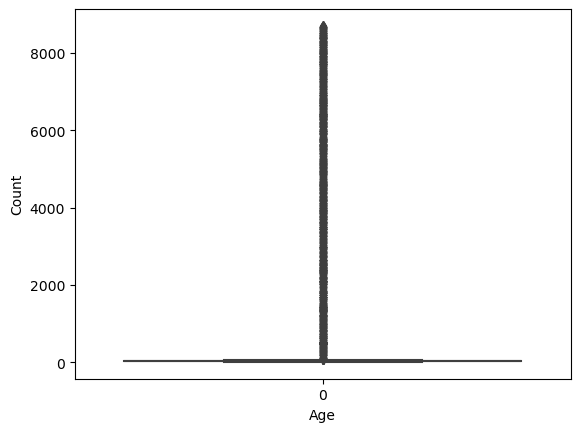

In [384]:
sns.boxplot(df['Age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [385]:
col_names = ['Age']
Q1 = df.Age.quantile(0.25)
Q3 = df.Age.quantile(0.75)
IQR = Q3 - Q1
data = df[(df.Age >= Q1 - 1.5*IQR) & (df.Age <= Q3 + 1.5*IQR)]

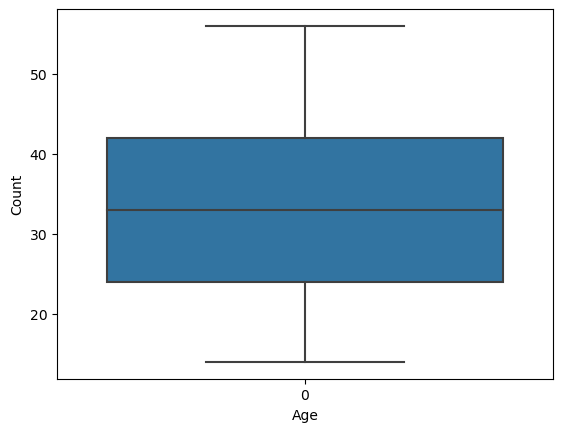

In [386]:
sns.boxplot(data['Age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [387]:
# PreProcessing

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Month'] = le.fit_transform(df['Month'])
df['Occupation'] = le.fit_transform(df['Occupation'])
df['Payment_Behaviour'] = le.fit_transform(df['Payment_Behaviour'])

In [388]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int64  
 1   Age                       100000 non-null  int64  
 2   Occupation                100000 non-null  int64  
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  int64  
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    100000 non-null  float64
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      100000 non-null  float64
 13  Credit_Mix                100000 non-null  fl

In [389]:
# Feature Selection

from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'Credit_Score')):
        col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                   for i in range(len(X.columns))]
vif_data

,feature,VIF
0,Month,0.300012
1,Age,0.970440
2,Occupation,0.277722
3,Annual_Income,0.985001
4,Monthly_Inhand_Salary,0.365970
5,Num_Bank_Accounts,0.979247
6,Num_Credit_Card,0.970567
7,Interest_Rate,0.976430
8,Num_of_Loan,0.970558
9,Delay_from_due_date,0.332213


In [390]:
X = df.drop(columns=['Credit_Score'])
Y = df['Credit_Score']

In [391]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [392]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [393]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

In [394]:
y_pred = lr.predict(X_test)

In [395]:
from sklearn.metrics import accuracy_score
acs = accuracy_score(Y_test,y_pred)
acs

0.619

In [396]:
# # Decision tree

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [397]:
y_pred2 = dt.predict(X_test)

In [398]:
accuracy_score(Y_test,y_pred2)

0.6438

In [408]:
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Ignore warnings
warnings.filterwarnings("ignore")

# Create an instance of DecisionTreeClassifier
dt = DecisionTreeClassifier()

# Define the parameter grid for GridSearchCV
parameters = {
    'max_features': ['log2', 'sqrt', 'auto'],
    'criterion': ['entropy', 'gini'],
    'max_depth': [2, 3, 5, 10, 50],
    'min_samples_split': [2, 3, 50, 100],
    'min_samples_leaf': [1, 5, 8, 10]
}

# Create an instance of GridSearchCV
grid_obj = GridSearchCV(dt, parameters, n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_obj.fit(X_train, Y_train)

# Get the best estimator from the grid search
dt = grid_obj.best_estimator_

# Fit the best estimator to the training data
dt.fit(X_train, Y_train)

# Make predictions on the test data
y_pred = dt.predict(X_test)

# Calculate the accuracy of the model
acc_dt = round(accuracy_score(Y_test, y_pred) * 100, 2)


/Users/ritikramesh/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/ritikramesh/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/ritikramesh/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/ritikramesh/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, exp

Accuracy of Decision Tree model: 67.68


In [409]:
print('Accuracy of Decision Tree model:', acc_dt)

Accuracy of Decision Tree model: 67.68


In [410]:
# # Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,Y_train)

RandomForestClassifier()

In [411]:
y_pred3 = rfc.predict(X_test)

In [412]:
accuracy_score(Y_test,y_pred3)

0.7622